In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/python_statistic/data/v100k.csv")
df.head()

,wheels,chassis,pax,vtype,class
0,1,1,1,Bike,1
1,1,1,1,Bike,1
2,1,1,1,Bike,1
3,1,1,1,Bike,1
4,1,1,1,Bike,1


In [2]:
df.columns

Index(['wheels', 'chassis', 'pax', 'vtype', 'class'], dtype='object')

In [3]:
df.shape

(100000, 5)

In [4]:
df.describe()

,wheels,chassis,pax,class
count,100000.00000,100000.000000,100000.000000,100000.00000
mean,7.51069,11.389390,7.390810,2.50285
std,6.44193,10.216578,10.845981,1.11800
min,1.00000,1.000000,1.000000,1.00000
25%,4.00000,1.000000,1.000000,2.00000
50%,5.00000,12.000000,2.000000,3.00000
75%,18.00000,21.000000,4.000000,4.00000
max,18.00000,29.000000,39.000000,4.00000


In [5]:
df.groupby("class").mean()

,wheels,chassis,pax
class,,,
1,1.000000,1.000000,1.000000
2,4.502697,2.499221,2.506572
3,6.472112,17.494334,24.570531
4,18.000000,24.482950,1.505896


Text(0, 0.5, '빈도')

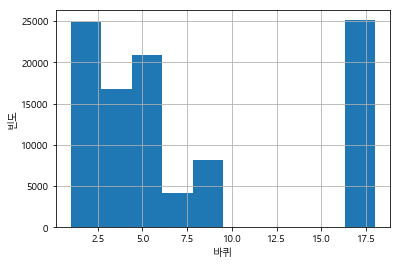

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)
df["wheels"].hist()
plt.xlabel("바퀴")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

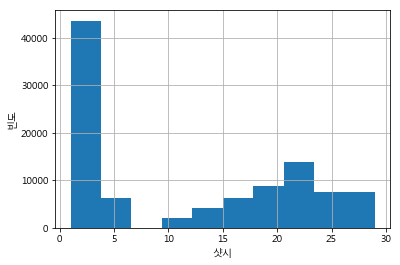

In [7]:
df["chassis"].hist()
plt.xlabel("샷시")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

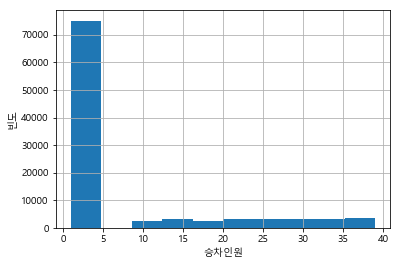

In [5]:
df["pax"].hist()
plt.xlabel("승차인원")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

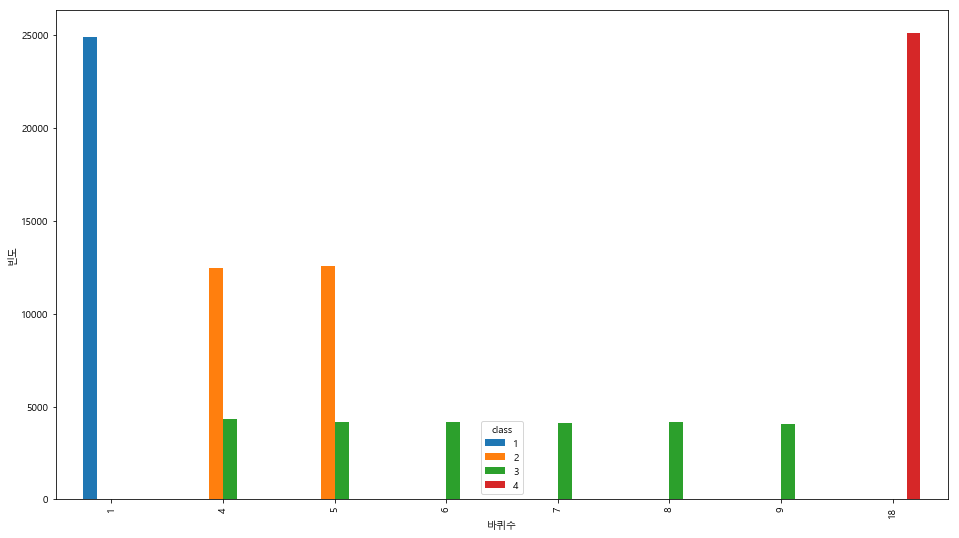

In [6]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["wheels"],df["class"]).plot(kind="bar")
plt.xlabel("바퀴수")
plt.ylabel("빈도")

In [7]:
df["class"].value_counts() #자전거,승용차,버스,트럭

4    25102
2    25029
3    24975
1    24894
Name: class, dtype: int64

Text(0.5, 1.0, '분류\n(1:자전거, 2:승용차, 3:버스, 4:트럭)')

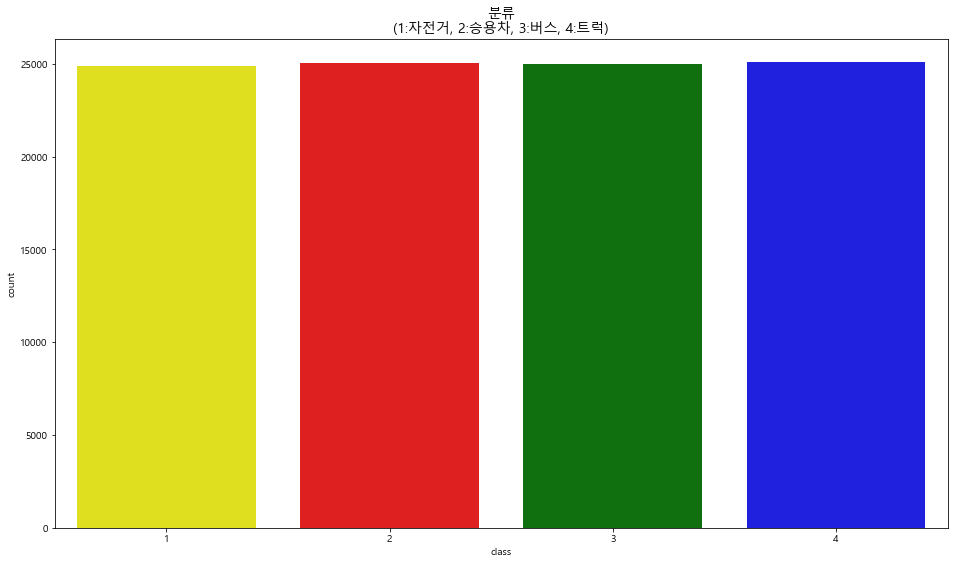

In [8]:
import seaborn as sns
colors=["yellow","red","green","blue"]
sns.countplot("class",data=df, palette=colors)
plt.title("분류\n(1:자전거, 2:승용차, 3:버스, 4:트럭)",fontsize=14)

In [9]:
train_cols=df.columns[0:3]
X=df[train_cols] #독립변수
y=df["class"] #종속변수

In [10]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["class"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df2["class"].value_counts() #자전거,승용차,버스,트럭

4    24894
3    24894
2    24894
1    24894
Name: class, dtype: int64

Text(0.5, 1.0, '분류\n(1:자전거, 2:승용차, 3:버스, 4:트럭)')

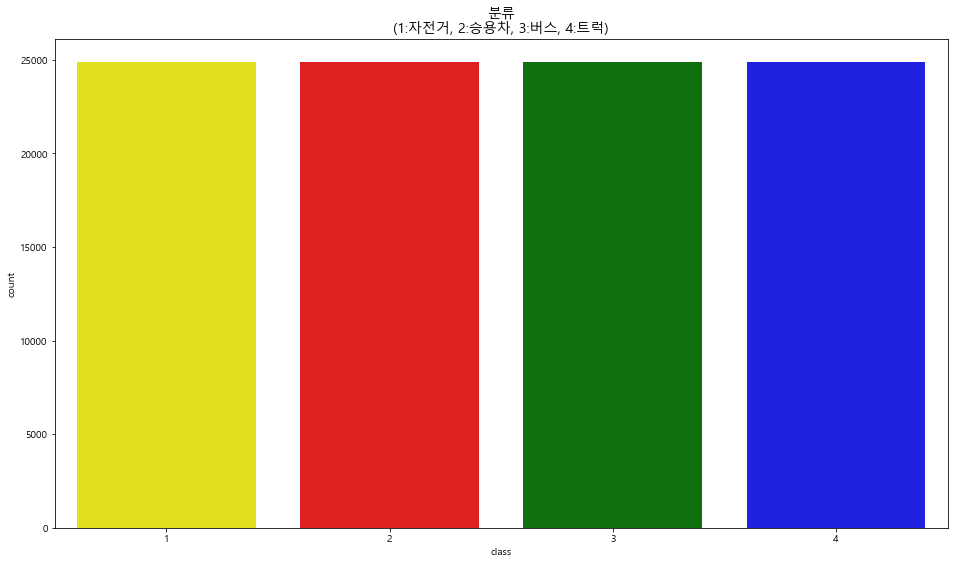

In [12]:
import seaborn as sns
colors=["yellow","red","green","blue"]
sns.countplot("class",data=df2, palette=colors)
plt.title("분류\n(1:자전거, 2:승용차, 3:버스, 4:트럭)",fontsize=14)

In [13]:
#샘플링 이후의 데이터로 변경
X=df2[train_cols]
y=df2["class"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#전체 데이터셋을 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=LogisticRegression() #로지스틱 회귀분석 모형 생성
model.fit(X_train,y_train) #모형 훈련

print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0
1.0


In [15]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #검증용 데이터셋을 입력하여 예측값 리턴
cm=confusion_matrix(y_test,pred) #실제값과 예측값 비교
cm

array([[4974,    0,    0,    0],
       [   0, 4984,    0,    0],
       [   0,    0, 4978,    0],
       [   0,    0,    0, 4980]], dtype=int64)

In [16]:
df_cm=pd.DataFrame(cm,index=[1,2,3,4],columns=[1,2,3,4])
df_cm #혼동행렬 출력

,1,2,3,4
1,4974,0,0,0
2,0,4984,0,0
3,0,0,4978,0
4,0,0,0,4980


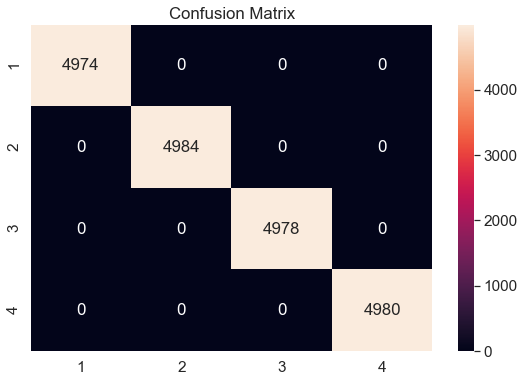

In [17]:
sns.set(font_scale=1.4) #폰트 사이즈
plt.figure(figsize=(9,6)) #가로,세로 인치 설정
plt.title("Confusion Matrix")
sns.heatmap(df_cm,annot=True,fmt="d") 